# Lab 04 : Train vanilla neural network -- exercise


# Training a one-layer net on  FASHION-MNIST

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5242_2025_codes/codes/labs_lecture03/lab04_train_vanilla_nn'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [2]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()

train_data=torch.load(data_path+'fashion-mnist/train_data.pt')
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

FASHION-MNIST dataset missing - downloading...


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



100.6%


Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [4]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [6]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        
        x = self.linear_layer(x)
        p = torch.softmax(x, dim=1)
        
        return p

### Build the net

In [7]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Take the 4th image of the test set:

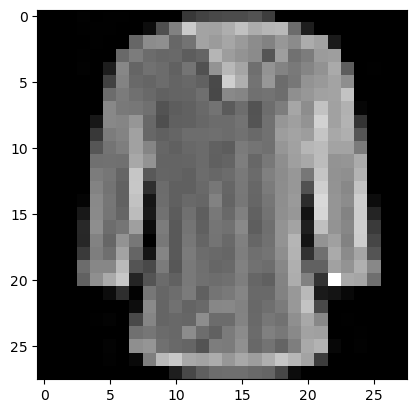

In [8]:
im= test_data[4]
utils.show(im)

### And feed it to the UNTRAINED network:

In [9]:
p =  net( im.view(1,784) ) 
print(p)

tensor([[0.0880, 0.1034, 0.0597, 0.1067, 0.1411, 0.1045, 0.1170, 0.0837, 0.1166,
         0.0793]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

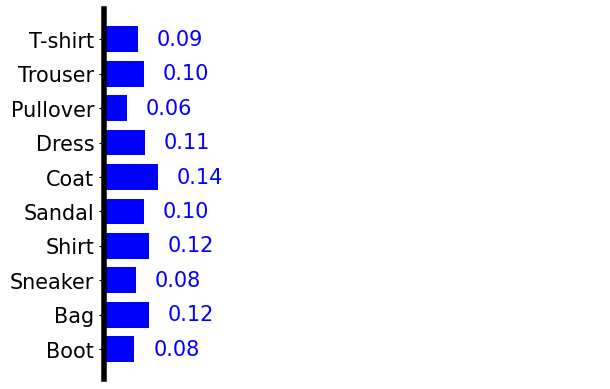

In [10]:
utils.show_prob_fashion_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [11]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network

    idx=randint(0, 60000-1)
    input=train_data[idx].view(1,784)
    label=train_label[idx].view(1)


    # feed the input to the net  
    input.requires_grad_() # for backprobagation -- we will discuss it later
    prob=net(input)  
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

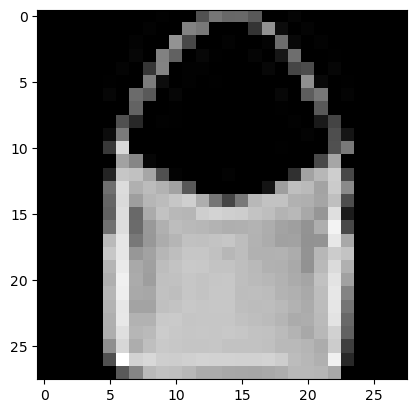

In [12]:
im= test_data[34]
utils.show(im)

### Feed it to the TRAINED net:

In [13]:
p =  net( im.view(1,784) ) 
print(p)

tensor([[1.5947e-03, 1.4047e-05, 7.5413e-02, 3.4313e-02, 1.1199e-03, 5.4874e-02,
         2.2361e-02, 3.7457e-04, 8.0941e-01, 5.2601e-04]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

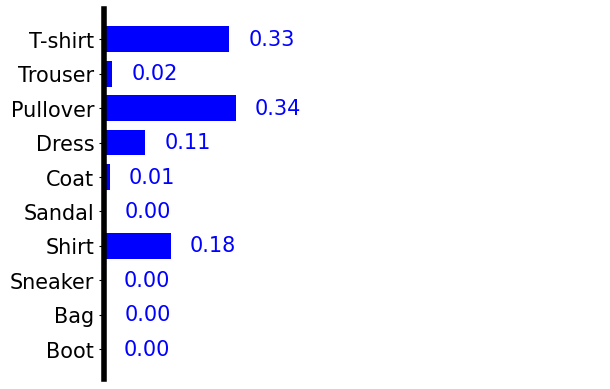

In [14]:
utils.show_prob_fashion_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

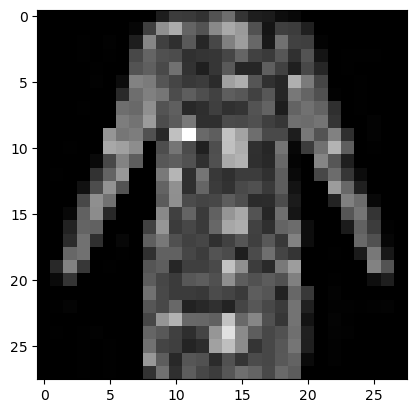

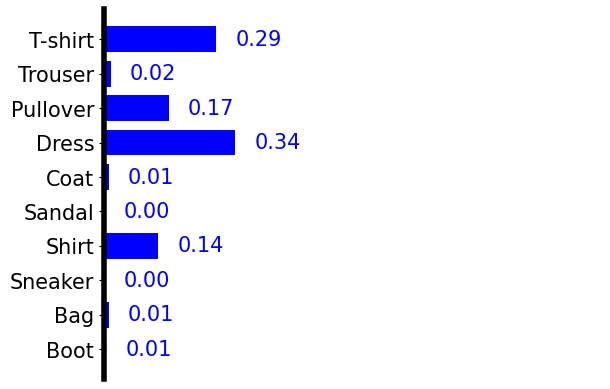

In [15]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)